# Inspect ERS file with magnetic data

Some links: 

For getting data: https://dirmin.no/data?utm_source=chatgpt.com 

For getting the magnetic maps: https://geo.ngu.no/geoscienceportalopen/Results?bookmark=3cbc4c8d7e304e2cac3ed830b50606bc#pSingleDatasetGeneral 

For getting the nominal mining rights maps: https://minit.dirmin.no/kart/


CRS: EPSG:32632
Resolution: (10.0, -10.0)
Shape (rows, cols): (1126, 997)
Bounds: (512156.088814, 6560852.07563, 522126.088814, 6572112.07563)
NoData: nan
Total datapoints: 699936
Number of negative values: 2399
Min: -312.1206359863281
Max: 2050.03515625
Mean: 141.57162475585938
Variance: 34557.74609375


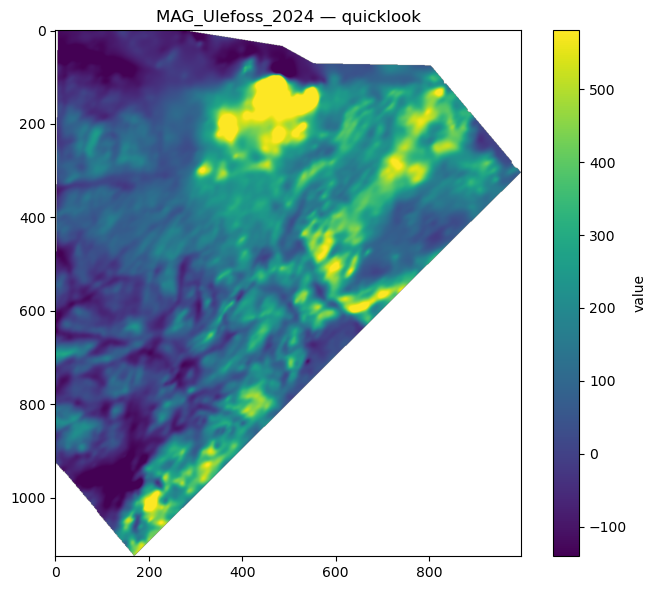

In [ ]:
import rioxarray as rxr
import numpy as np
import matplotlib.pyplot as plt

# Path to your raster
#ERS_PATH = "/Users/erlend/RareEarthProject/MAG_Ulefoss_2024/TMI.ERS"
ERS_PATH = "/Users/erlend/RareEarthProject/MAG_Ulefoss_2024/TMI.ERS"

# Load raster
da = rxr.open_rasterio(ERS_PATH, masked=True).squeeze(drop=True)

print("CRS:", da.rio.crs)
print("Resolution:", da.rio.resolution())
print("Shape (rows, cols):", da.shape)
print("Bounds:", da.rio.bounds())
print("NoData:", da.rio.nodata)

# Get numpy array and flatten valid values
vals = da.values
valid = vals.compressed() if np.ma.isMaskedArray(vals) else vals.ravel()
valid = valid[np.isfinite(valid)]

# Stats
total_points = valid.size
count_neg = (valid > 1000).sum()

min_val = valid.min()
max_val = valid.max()
mean_val = valid.mean()
var_val = valid.var()  # ddof=0 for population variance

print(f"Total datapoints: {total_points}")
print(f"Number of negative values: {count_neg}")
print(f"Min: {min_val}")
print(f"Max: {max_val}")
print(f"Mean: {mean_val}")
print(f"Variance: {var_val}")

# Stretch for display (2–98 percentile)
p2, p98 = np.percentile(valid, [2, 98]) if valid.size else (None, None)

plt.figure(figsize=(7, 6))
im = plt.imshow(vals, vmin=p2, vmax=p98)
plt.colorbar(im, label="value")
plt.title("MAG_Ulefoss_2024 — quicklook")
plt.tight_layout()
plt.show()


# Inspect CSV file with mineral rights

In [2]:
# Check the first few lines without parsing
with open("/Users/erlend/RareEarthProject/bergrettigheter.csv", "r", encoding="utf-8") as f:
    for i in range(3):
        print(f.readline())

Rettighetsnummer;Rettighetsnavn;Rettighetstype;Rettighetshaver;Organisasjonsnummer;Status;Mottatt;Godkjent;Mineral;Kommunenummer;Kommunenavn;Fylkesnummer;Fylkesnavn;Geometri

0011/1981-TB;Bergmester 5;UTVINNINGSRETT;Staten;974760282;Godkjent;1981-03-30;1981-09-23;Jern,Vanadium;1557,1506;Gjemnes,Molde;15;Møre og Romsdal;POLYGON ((8.07200388777465 62.8394968948066,8.07590627637884 62.8416589676919,8.0935463489811 62.8442092220318,8.09494208251876 62.8420587285935,8.07200388777465 62.8394968948066))

0001/1982-TB;Hersjø 1;UTVINNINGSRETT;Hessjøgruva AS;996601536;Godkjent;1982-05-28;1982-09-07;Kobber,Py,Sink;5026;Holtålen;50;Trøndelag - Trööndelage;POLYGON ((11.104453184475 62.6815912285269,11.1259832005042 62.6856581797543,11.1278096984097 62.6835892855153,11.1062809409298 62.6795226205579,11.104453184475 62.6815912285269))



In [3]:
import pandas as pd 

df = pd.read_csv("/Users/erlend/RareEarthProject/bergrettigheter.csv",
    sep=";")

print(df.columns)
print(df["Geometri"][0])
df.head()

Index(['Rettighetsnummer', 'Rettighetsnavn', 'Rettighetstype',
       'Rettighetshaver', 'Organisasjonsnummer', 'Status', 'Mottatt',
       'Godkjent', 'Mineral', 'Kommunenummer', 'Kommunenavn', 'Fylkesnummer',
       'Fylkesnavn', 'Geometri'],
      dtype='object')
POLYGON ((8.07200388777465 62.8394968948066,8.07590627637884 62.8416589676919,8.0935463489811 62.8442092220318,8.09494208251876 62.8420587285935,8.07200388777465 62.8394968948066))


,Rettighetsnummer,Rettighetsnavn,Rettighetstype,Rettighetshaver,Organisasjonsnummer,Status,Mottatt,Godkjent,Mineral,Kommunenummer,Kommunenavn,Fylkesnummer,Fylkesnavn,Geometri
0,0011/1981-TB,Bergmester 5,UTVINNINGSRETT,Staten,974760282,Godkjent,1981-03-30,1981-09-23,"Jern,Vanadium","1557,1506","Gjemnes,Molde",15,Møre og Romsdal,"POLYGON ((8.07200388777465 62.8394968948066,8...."
1,0001/1982-TB,Hersjø 1,UTVINNINGSRETT,Hessjøgruva AS,996601536,Godkjent,1982-05-28,1982-09-07,"Kobber,Py,Sink",5026,Holtålen,50,Trøndelag - Trööndelage,"POLYGON ((11.104453184475 62.6815912285269,11...."
2,0002/1982-TB,Hersjø 2,UTVINNINGSRETT,Hessjøgruva AS,996601536,Godkjent,1982-05-28,1982-09-07,"Kobber,Py,Sink",5026,Holtålen,50,Trøndelag - Trööndelage,"POLYGON ((11.1062809409298 62.6795226205579,11..."
3,0003/1982-TB,Hersjø 3,UTVINNINGSRETT,Hessjøgruva AS,996601536,Godkjent,1982-05-28,1982-09-07,"Kobber,Py,Sink",5026,Holtålen,50,Trøndelag - Trööndelage,"POLYGON ((11.1134897576838 62.6784709055023,11..."
4,0001/1986-NB,Ørtfjell 1,UTVINNINGSRETT,Rana Gruber ASA,953049724,Godkjent,1986-07-16,1986-09-08,Jern,1833,Rana,18,Nordland - Nordlánnda,"POLYGON ((14.6724953757499 66.4198129300522,14..."


In [4]:
exclude_column = 'Geometri'
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.width', None,
                       'display.max_colwidth', None):
    for col in df.columns:
        if col == "Kommunenavn":
            print(f"\nColumn: {col}")
            print(df[col].value_counts(dropna=False))



Column: Kommunenavn
Kommunenavn
Guovdageaidnu - Kautokeino                               190
Kárášjohka - Karasjok                                    116
Aarborte - Hattfjelldal                                  108
Fauske - Fuossko                                          91
Hammerfest - Hámmerfeasta                                 86
Rana                                                      78
Hábmer - Hamarøy                                          70
Narvik                                                    67
Eigersund                                                 56
Alta                                                      39
Porsanger - Porsáŋgu - Porsanki                           34
Sørfold                                                   31
Sokndal                                                   31
Raarvihke - Røyrvik                                       28
Nome                                                      27
Holtålen                                            

In [168]:
#Filter so we just look at Nome county
mining_rights = df[df['Kommunenavn'] == 'Nome']

exclude_column = 'Geometri'
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.width', None,
                       'display.max_colwidth', None):
    for col in mining_rights.columns:
        if col == "Rettighetshaver":
            print(f"\nColumn: {col}")
            print(mining_rights[col].value_counts(dropna=False))


mining_rights_REE = df[df['Rettighetshaver'] == 'Rare Earths Norway AS']

mining_rights_REE.head()




Column: Rettighetshaver
Rettighetshaver
Rare Earths Norway AS    13
Norway Minerals AS        5
SAGA RARE EARTHS AS       4
FEN HOLDING AS            3
REE EXPLORATION AS        2
Name: count, dtype: int64


,Rettighetsnummer,Rettighetsnavn,Rettighetstype,Rettighetshaver,Organisasjonsnummer,Status,Mottatt,Godkjent,Mineral,Kommunenummer,Kommunenavn,Fylkesnummer,Fylkesnavn,Geometri
115,0097-1/2016,Rauhaug 2,UNDERSOEKELSESRETT,Rare Earths Norway AS,918662049,Godkjent,2016-06-13,2016-07-15,REE,4018,Nome,40,Telemark,MULTIPOLYGON (((9.30400320005023 59.2714115471...
144,0094-2/2017,Ulefoss 1,UNDERSOEKELSESRETT,Rare Earths Norway AS,918662049,Godkjent,2017-06-19,2017-07-04,"Niob,REE,Ta,Thorium",4018,Nome,40,Telemark,"POLYGON ((9.26676842456673 59.284083540149,9.2..."
145,0094-3/2017,Ulefoss 2,UNDERSOEKELSESRETT,Rare Earths Norway AS,918662049,Godkjent,2017-06-19,2017-07-04,"Niob,REE,Ta,Thorium",4018,Nome,40,Telemark,"POLYGON ((9.26662800960334 59.2661232099143,9...."
772,0002/2023,Fen 1,UTVINNINGSRETT,Rare Earths Norway AS,918662049,Godkjent,2023-03-30,2023-09-08,REE,4018,Nome,40,Telemark,"POLYGON ((9.27800062905034 59.2840600503823,9...."
773,0003/2023,Fen 2,UTVINNINGSRETT,Rare Earths Norway AS,918662049,Godkjent,2023-03-30,2023-09-08,REE,4018,Nome,40,Telemark,"POLYGON ((9.27792744292692 59.2750798998671,9...."


In [169]:
print(mining_rights_REE["Geometri"].iloc[0])

MULTIPOLYGON (((9.30400320005023 59.2714115471365,9.32175590582284 59.2712043804597,9.3216935320148 59.2645888887048,9.3038203758802 59.2646717852619,9.30400320005023 59.2714115471365)), ((9.30832943202805 59.2725598376053,9.32176838254417 59.2725273235351,9.32175590582284 59.2712043804597,9.30819270435043 59.2713632630488,9.30832943202805 59.2725598376053)), ((9.29537389406522 59.2635825989241,9.32168345911206 59.2635202524977,9.32162929825007 59.2577729622846,9.29532416270044 59.2578352945511,9.29537389406522 59.2635825989241)), ((9.30838276400326 59.2784597841793,9.32182403896911 59.2784272625246,9.32176838254417 59.2725273235351,9.30832943202805 59.2725598376053,9.30838276400326 59.2784597841793)), ((9.3018690009337 59.2840069185013,9.3194192166443 59.2839650604941,9.31936741134278 59.2784333100318,9.30182004192175 59.2784751588853,9.3018690009337 59.2840069185013)), ((9.3016980436727 59.2646816596339,9.3216935320148 59.2645888887048,9.32168345911206 59.2635202524977,9.301688199919

# Upgrade to geopandas

In [ ]:
import geopandas as gpd
import pandas as pd

gdf = gpd.read_file("/Users/erlend/RareEarthProject/bergrettigheter.csv",
    sep=";")


exclude_column = 'Geometri'
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.width', None,
                       'display.max_colwidth', None):
    for col in mining_rights.columns:
        if col == "Rettighetshaver":
            print(f"\nColumn: {col}")
            print(mining_rights[col].value_counts(dropna=False))

# 3) Further filter to only REE EXPLORATION AS
data_REE = gdf[
    (gdf['Organisasjonsnummer'] == '926114174') |
    (
        (gdf['Organisasjonsnummer'] == '918662049') &
        (gdf['Rettighetsnavn'].str.contains('Fen', na=False))
    )
]


print(len(data_REE))
#data_REE = gdf[gdf['Organisasjonsnummer'] == '827062472']
#data_REE

#data_REE = gdf[gdf['Fylkesnummer'] == '40']


#data_REE = data_REE[data_REE["Organisasjonsnummer"] == '926114174']


#data_REE.head()
#data_competitor.head()

#len(data_REE)


Column: Rettighetshaver
Rettighetshaver
Rare Earths Norway AS    13
Norway Minerals AS        5
SAGA RARE EARTHS AS       4
FEN HOLDING AS            3
REE EXPLORATION AS        2
Name: count, dtype: int64
11


/Users/erlend/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:198: RuntimeWarning: driver CSV does not support open option SEP
  return ogr_read(


,Rettighetsnummer,Rettighetsnavn,Rettighetstype,Rettighetshaver,Organisasjonsnummer,Status,Mottatt,Godkjent,Mineral,Kommunenummer,Kommunenavn,Fylkesnummer,Fylkesnavn,Geometri
443,0198/2022,FENS BUKTA 1,UNDERSOEKELSESRETT,REE EXPLORATION AS,926114174,Godkjent,2022-03-07,2022-04-21,"Niob,Thorium,Uran,Zirkonium",4018,Nome,40,Telemark,"POLYGON ((9.25510978133117 59.2485088744277,9...."
444,0199/2022,FENS BUKTA 2,UNDERSOEKELSESRETT,REE EXPLORATION AS,926114174,Godkjent,2022-03-07,2022-04-21,"Niob,Thorium,Uran,Zirkonium","4018,4003","Nome,Skien",40,Telemark,"POLYGON ((9.25497557320575 59.2305719768863,9...."
445,0200/2022,FENS BUKTA 3,UNDERSOEKELSESRETT,REE EXPLORATION AS,926114174,Godkjent,2022-03-07,2022-04-21,"Niob,Thorium,Uran,Zirkonium","4018,4003","Nome,Skien",40,Telemark,"POLYGON ((9.33937344517331 59.2785892607366,9...."
446,0201/2022,FENS BUKTA 4,UNDERSOEKELSESRETT,REE EXPLORATION AS,926114174,Godkjent,2022-03-07,2022-04-21,"Niob,Thorium,Uran,Zirkonium","4018,4003","Nome,Skien",40,Telemark,"POLYGON ((9.33919591058366 59.2606518195537,9...."
492,0309/2022,FENS BUKTA 5,UNDERSOEKELSESRETT,REE EXPLORATION AS,926114174,Godkjent,2022-06-15,2022-06-21,Thorium,4018,Nome,40,Telemark,"POLYGON ((9.22300269747291 59.2849201701254,9...."


In [200]:
from shapely import wkt

data_REE["geometry"] = data_REE["Geometri"].apply(wkt.loads)

data_REE_gdp = gpd.GeoDataFrame(data_REE, geometry="geometry", crs="EPSG:4326")


assert isinstance(data_REE_gdp, gpd.GeoDataFrame), "data_REE must be a GeoDataFrame"
assert data_REE_gdp.crs is not None, "data_REE has no CRS; set it if needed (e.g. EPSG:4326)"
print("raster CRS:", da.rio.crs, "| polygons CRS:", data_REE_gdp.crs)


raster CRS: EPSG:32632 | polygons CRS: EPSG:4326


/var/folders/52/h0khbcc10wgdr52l2lm52cy00000gn/T/ipykernel_96637/149847642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_REE["geometry"] = data_REE["Geometri"].apply(wkt.loads)


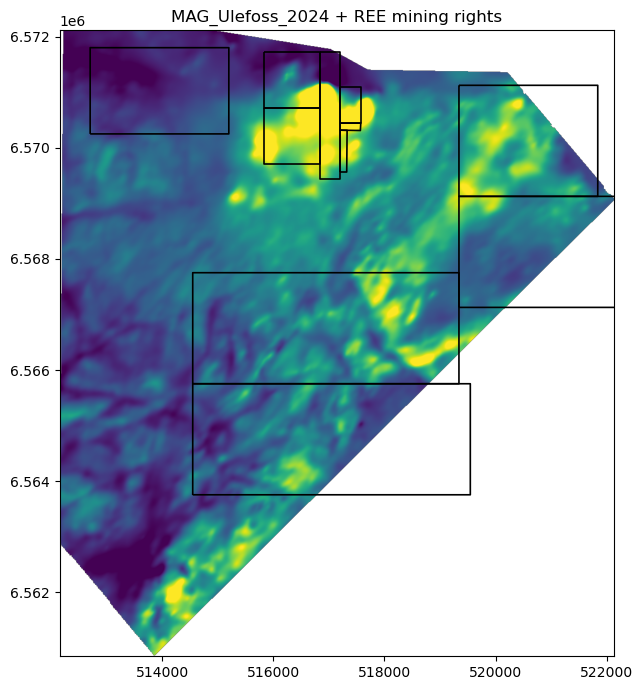

In [201]:
import numpy as np, matplotlib.pyplot as plt

# Reproject polygons → raster CRS
gdf_proj = data_REE_gdp.to_crs(da.rio.crs)

# Robust stretch for the raster
vals = da.values
valid = vals.compressed() if np.ma.isMaskedArray(vals) else vals.ravel()
valid = valid[np.isfinite(valid)]
vmin, vmax = np.percentile(valid, [2, 98]) if valid.size else (None, None)

# Raster extent
minx, miny, maxx, maxy = da.rio.bounds()

# Plot
fig, ax = plt.subplots(figsize=(8,7))
ax.imshow(vals, extent=[minx, maxx, miny, maxy], origin="upper",
          vmin=vmin, vmax=vmax, cmap="viridis")
gdf_proj.boundary.plot(ax=ax, color="black", linewidth=1.2)
ax.set_title("MAG_Ulefoss_2024 + REE mining rights")
ax.set_xlim(minx, maxx); ax.set_ylim(miny, maxy)
plt.tight_layout(); plt.show()



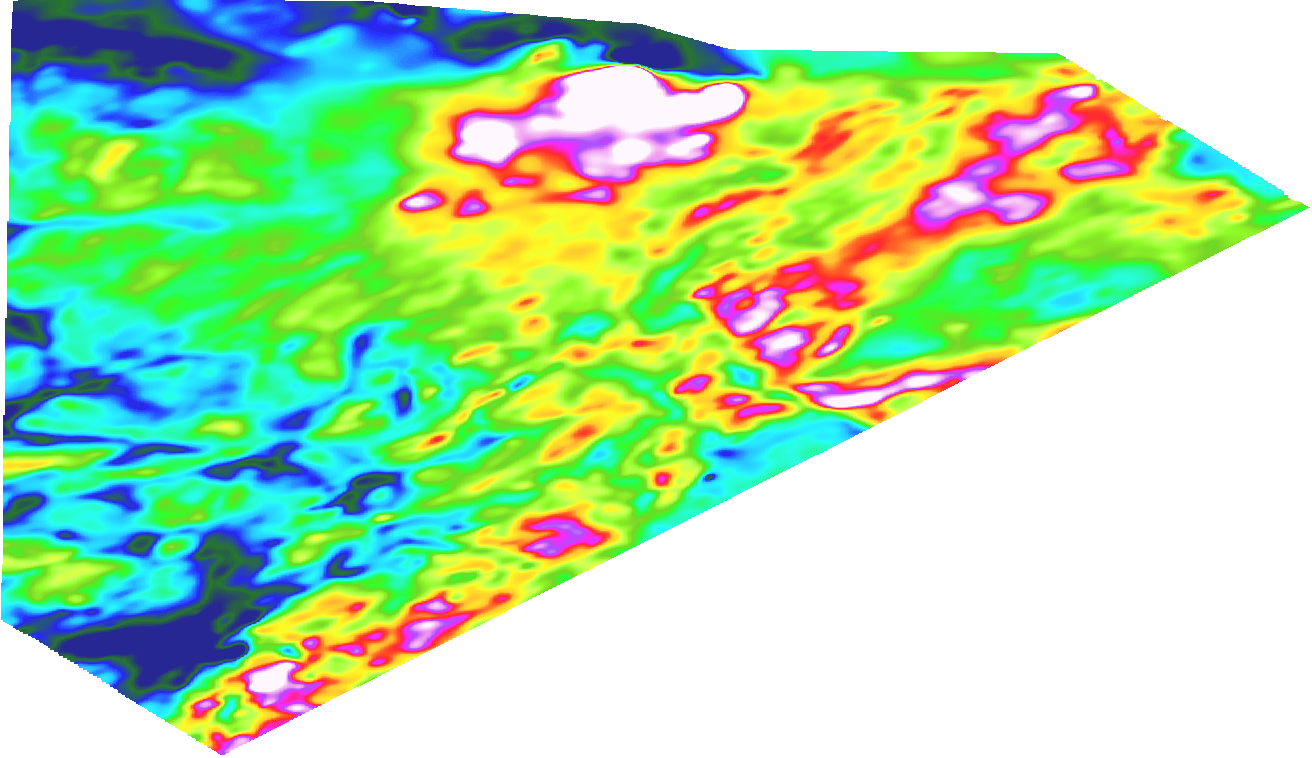

In [ ]:
import numpy as np
from matplotlib import cm, colors
from PIL import Image
import folium
import rioxarray as rxr

# Reproject raster to EPSG:4326 for web maps
da4326 = da.rio.reproject("EPSG:4326")

# Build RGBA PNG with transparency where data is missing
arr = da4326.values
if arr.ndim == 3 and arr.shape[0] == 1:
    arr = arr[0]                # ensure 2D (H, W)
arr = arr.astype(float)
mask = np.isfinite(arr)

# Contrast stretch
if mask.any():
    p2, p98 = np.nanpercentile(arr[mask], [2, 98])
    if np.isclose(p2, p98):  # avoid divide-by-zero
        p2, p98 = p2 - 1, p98 + 1
else:
    p2, p98 = 0.0, 1.0

norm = colors.Normalize(vmin=p2, vmax=p98, clip=True)
rgba = cm.get_cmap("gist_ncar")(norm(arr))   # (H,W,4) float
rgba[..., 3] = 0.0
rgba[..., 3][mask] = 0.85                  # semi‑transparent where valid
rgba_u8 = (rgba * 255).astype(np.uint8)    # (H,W,4) uint8


Image.fromarray(rgba_u8, mode="RGBA").save("mag_overlay.png")

# Bounds for overlay (south,west,north,east)
minx, miny, maxx, maxy = da4326.rio.bounds()
bounds = [[miny, minx], [maxy, maxx]]

# Polygons to EPSG:4326
gdf4326 = data_REE_gdp.to_crs(4326)

# Center map on polygons
centroid = gdf4326.unary_union.centroid
m = folium.Map(location=[centroid.y, centroid.x], zoom_start=12, tiles="OpenStreetMap")

# Add raster image
folium.raster_layers.ImageOverlay(
    name="Magnetic survey",
    image="mag_overlay.png",
    bounds=bounds,
    opacity=0.5,
    interactive=False,
).add_to(m)

# Add polygons
style = lambda f: {"color": "black", "weight": 1.5, "fillOpacity": 0.0}
folium.GeoJson(
    gdf4326.__geo_interface__,
    name="REE mining rights",
    style_function=style,
    tooltip=folium.GeoJsonTooltip(
        fields=["Rettighetsnavn","Rettighetstype", "Organisasjonsnummer","Rettighetshaver", "Status","Mineral","Kommunenavn"],
        aliases=["Name","Type","Organisation number", "Owner", "Status", "Minerals","Municipality"],
        sticky=False,
    ),
).add_to(m)

folium.GeoJson(
    gdf4326.__geo_interface__,
    name="REE mining rights",
    style_function=style,
    tooltip=folium.GeoJsonTooltip(
        fields=["Rettighetsnavn","Rettighetstype", "Organisasjonsnummer","Rettighetshaver", "Status","Mineral","Kommunenavn"],
        aliases=["Name","Type","Organisation number", "Owner", "Status", "Minerals","Municipality"],
        sticky=False,
    ),
).add_to(m)

for _, row in gdf4326.iterrows():
    c = row.geometry.representative_point()  # inside polygon
    folium.Marker(
        location=[c.y, c.x],
        icon=folium.DivIcon(
            icon_size=(0, 0),  # make wide enough
            html = f'<div style="font-size:10pt; color:black; white-space:nowrap;"><b>{row["Rettighetsnavn"].replace("\n", " ").strip()}</b></div>'
            )
    ).add_to(m)


m

/var/folders/52/h0khbcc10wgdr52l2lm52cy00000gn/T/ipykernel_96637/1564391697.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  rgba = cm.get_cmap("gist_ncar")(norm(arr))
/var/folders/52/h0khbcc10wgdr52l2lm52cy00000gn/T/ipykernel_96637/1564391697.py:39: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  centroid = gdf4326.unary_union.centroid
/Users/erlend/anaconda3/lib/python3.12/site-packages/shapely/set_operations.py:553: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)



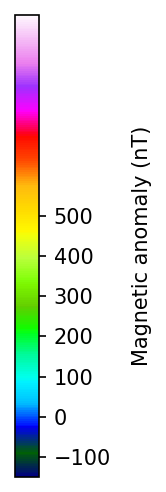
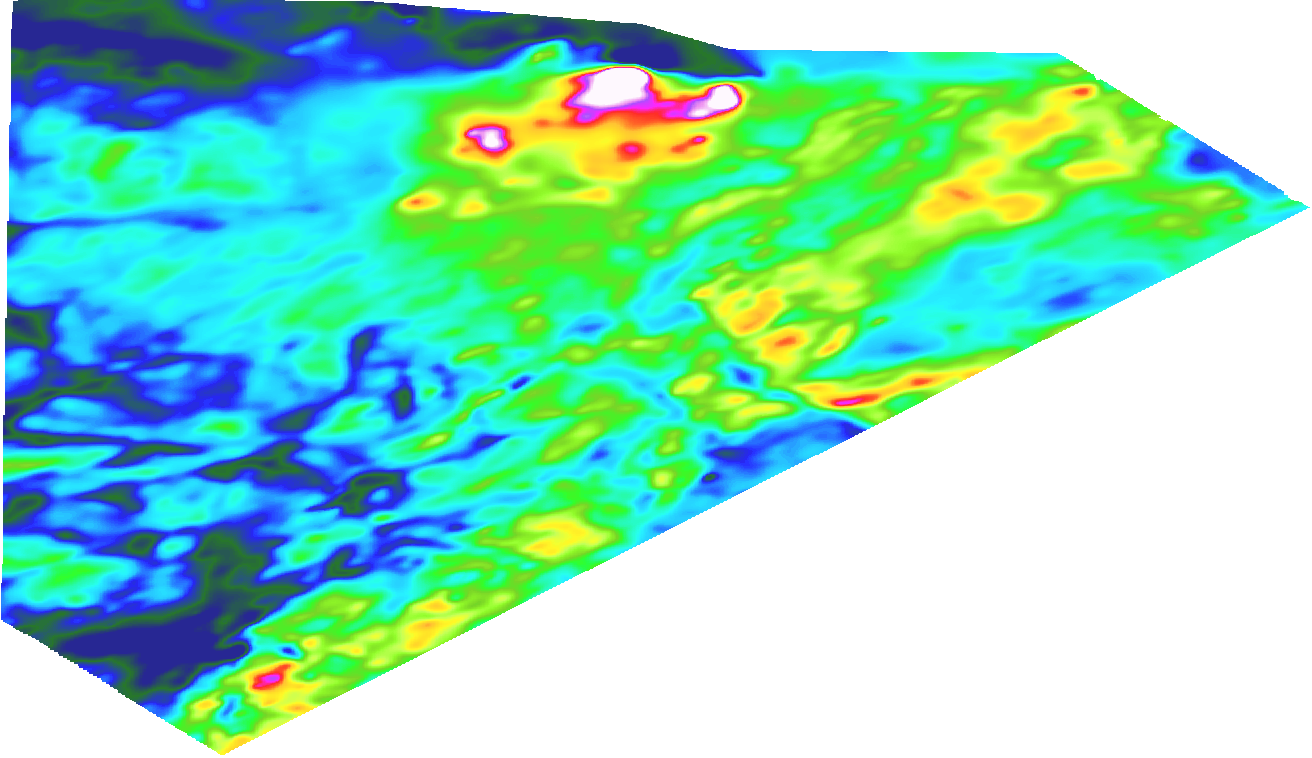

In [190]:
import numpy as np
import io, base64
from matplotlib import cm, colors, pyplot as plt
from PIL import Image
import folium
import rioxarray as rxr
import geopandas as gpd

# --- Reproject raster to EPSG:4326 for web maps ---
da4326 = da.rio.reproject("EPSG:4326")

# --- Build RGBA PNG with transparency ---
arr = da4326.values
if arr.ndim == 3 and arr.shape[0] == 1:
    arr = arr[0]  # ensure 2D
arr = arr.astype(float)
mask = np.isfinite(arr)

# Clamp negative values to 0
#arr[arr < 0] = 0

# Fixed scale 0–500 nT
norm = colors.Normalize(vmin=-150, vmax=1000, clip=True)
rgba = cm.get_cmap("gist_ncar")(norm(arr))
rgba[..., 3] = 0.0
rgba[..., 3][mask] = 0.85
rgba_u8 = (rgba * 255).astype(np.uint8)

Image.fromarray(rgba_u8, mode="RGBA").save("mag_overlay.png")

# --- Bounds for overlay (south,west,north,east) ---
minx, miny, maxx, maxy = da4326.rio.bounds()
bounds = [[miny, minx], [maxy, maxx]]

# --- Polygons to EPSG:4326 ---
gdf4326 = data_REE_gdp.to_crs(4326)

# --- Create Folium map ---
centroid = gdf4326.unary_union.centroid
m = folium.Map(location=[centroid.y, centroid.x], zoom_start=12, tiles="OpenStreetMap")

# Raster overlay
folium.raster_layers.ImageOverlay(
    name="Magnetic survey",
    image="mag_overlay.png",
    bounds=bounds,
    opacity=1.0,
    interactive=False,
).add_to(m)

# Polygon overlay with tooltip
style = lambda f: {"color": "black", "weight": 3, "fillOpacity": 0.0}
folium.GeoJson(
    gdf4326.__geo_interface__,
    name="REE mining rights",
    style_function=style,
    tooltip=folium.GeoJsonTooltip(
        fields=["Rettighetsnavn","Rettighetstype","Status","Mineral","Kommunenavn"],
        aliases=["Name","Type","Status","Minerals","Municipality"],
        sticky=False,
    ),
).add_to(m)

# Add polygon labels
#for _, row in gdf4326.iterrows():
#    c = row.geometry.representative_point()
#    last_symbol = row["Rettighetsnavn"].split()[-1]  # get last part of the name
#    folium.Marker(
#        location=[c.y, c.x],
#        icon=folium.DivIcon(
#            icon_size=(-50, 50),
#            html=f'<div style="font-size:15pt; color:black; white-space:nowrap;"><b>{last_symbol}</b></div>'
#        )
#    ).add_to(m)


# --- Create vertical Matplotlib colorbar ---
fig, ax = plt.subplots(figsize=(0.4, 4))
fig.subplots_adjust(left=0.5)
cb = plt.colorbar(
    cm.ScalarMappable(norm=norm, cmap="gist_ncar"),
    cax=ax,
    orientation="vertical",
    ticks=[-100,0,100, 200, 300, 400, 500]
)
cb.set_label("Magnetic anomaly (nT)", rotation=90, labelpad=10)

buf = io.BytesIO()
plt.savefig(buf, format="png", dpi=150, bbox_inches="tight", transparent=True)
plt.close(fig)
legend_data = base64.b64encode(buf.getbuffer()).decode("ascii")

# Add legend to map
legend_html = f"""
<div style="position: fixed;
     top: 100px; right: 15px; width: 150px; height: 500px;
     z-index: 9999; background-color: rgba(255,255,255,0.8);
     padding: 4px; border-radius: 5px; box-shadow: 0 0 4px #555;">
    <img src="data:image/png;base64,{legend_data}" style="width:100%; height:100%;">
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

# Show the map



m.save("magneticProperties.html")
m




In [44]:
from matplotlib.colors import ListedColormap, Normalize
from matplotlib import cm
import numpy as np
from PIL import Image

# --- (A) define YOUR palette here (edit freely) ---
# Example: deep-blue → cyan → green → yellow → orange → red → magenta
CUSTOM_HEX = [
    "#0015FF", "#00A6FF", "#00FFD5", "#49FF00",
    "#E6FF00", "#FFB600", "#FF4D00", "#51FF00"
]
custom_cmap = ListedColormap(CUSTOM_HEX, name="my_mag_palette")

# --- (B) rebuild the PNG using your cmap (da4326 from earlier steps) ---
arr = da4326.values
if arr.ndim == 3 and arr.shape[0] == 1:
    arr = arr[0]
arr = arr.astype(float)
mask = np.isfinite(arr)

# 2–98% stretch (robust)
if mask.any():
    p2, p98 = np.nanpercentile(arr[mask], [2, 98])
    if np.isclose(p2, p98): p2, p98 = p2 - 1, p98 + 1
else:
    p2, p98 = 0.0, 1.0

norm = Normalize(vmin=p2, vmax=p98, clip=True)
rgba = cm.ScalarMappable(norm=norm, cmap=custom_cmap).to_rgba(arr)  # (H,W,4) float 0..1

# Set base transparency (edit 0.0–1.0)
ALPHA = 0.80
rgba[..., 3] = 0.0
rgba[..., 3][mask] = ALPHA

rgba_u8 = (rgba * 255).astype(np.uint8)
Image.fromarray(rgba_u8, mode="RGBA").save("mag_overlay.png")

# (bounds unchanged)
minx, miny, maxx, maxy = da4326.rio.bounds()
bounds = [[miny, minx], [maxy, maxx]]


9.25510978133117
59.2485088744277
9.33907248241598
59.2483139543079
9.33889452732342
59.2303802729604
9.25497557320575
59.2305719768863
9.25510978133117
59.2485088744277
(9.25510978133117, 9.33907248241598, 9.33889452732342, 9.25497557320575, 9.25510978133117) (59.2485088744277, 59.2483139543079, 59.2303802729604, 59.2305719768863, 59.2485088744277)


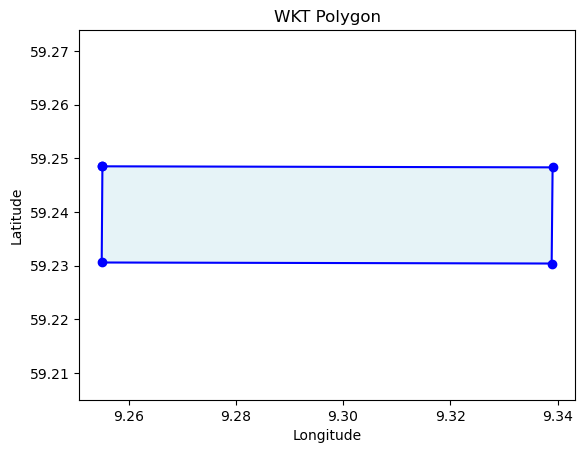

In [45]:
import matplotlib.pyplot as plt

# Your WKT polygon string
wkt_polygon = """POLYGON ((9.25510978133117 59.2485088744277,
          9.33907248241598 59.2483139543079,
          9.33889452732342 59.2303802729604,
          9.25497557320575 59.2305719768863,
          9.25510978133117 59.2485088744277))"""

# Parse WKT string into list of (x, y) tuples
coords = []
for pair in wkt_polygon.replace("POLYGON ((", "").replace("))", "").split(","):
    x_str, y_str = pair.strip().split()

    print(float(x_str))
    print(float(y_str))
    coords.append((float(x_str), float(y_str)))

# Extract X and Y lists for plotting
xs, ys = zip(*coords)
print(xs, ys)

# Plot
plt.figure()
plt.plot(xs, ys, marker='o', color='blue')
plt.fill(xs, ys, alpha=0.3, color='lightblue')
plt.axis('equal')
plt.title("WKT Polygon")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()



/var/folders/52/h0khbcc10wgdr52l2lm52cy00000gn/T/ipykernel_96637/392259897.py:5: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  center = [gdf4326.unary_union.centroid.y, gdf4326.unary_union.centroid.x]



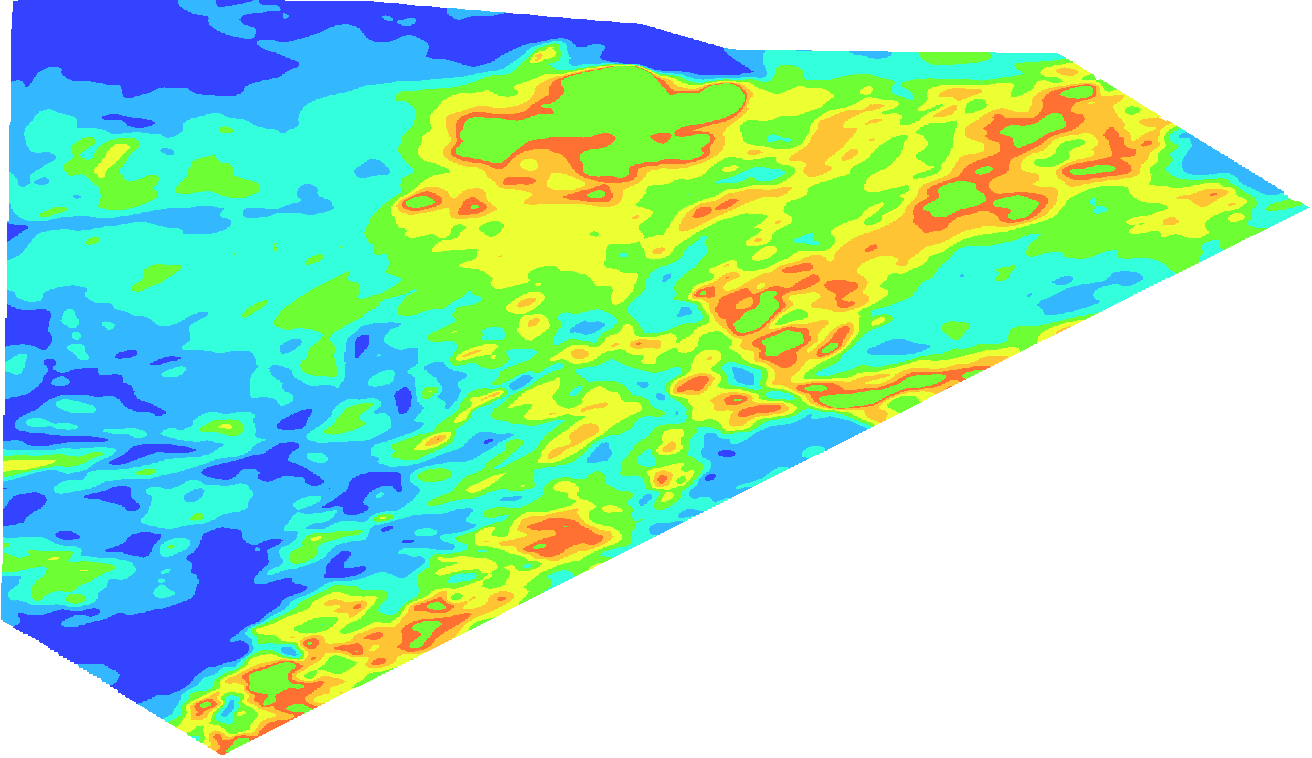

In [46]:
import folium
import folium.plugins as plugins

gdf4326 = data_REE_gdp.to_crs(4326)
center = [gdf4326.unary_union.centroid.y, gdf4326.unary_union.centroid.x]

# ✅ built-in Leaflet scale bar
m = folium.Map(location=center, zoom_start=12, tiles="OpenStreetMap", control_scale=True)

# Raster overlay
raster_layer = folium.raster_layers.ImageOverlay(
    name="Magnetic survey",
    image="mag_overlay.png",
    bounds=bounds,
    opacity=1.0,
    interactive=False,
)
raster_layer.add_to(m)

# Polygons + tooltip
style = lambda f: {"color": "black", "weight": 1.2, "fillOpacity": 0.0}
folium.GeoJson(
    gdf4326.__geo_interface__,
    name="REE mining rights",
    style_function=style,
    tooltip=folium.GeoJsonTooltip(
        fields=["Rettighetsnavn","Rettighetstype","Status","Mineral","Kommunenavn","Mottatt","Godkjent"],
        aliases=["Name","Type","Status","Minerals","Municipality","Received","Approved"],
    ),
).add_to(m)

# Distance/area measurement tool (this one IS in folium.plugins)
plugins.MeasureControl(
    position="topleft",
    primary_length_unit="kilometers",
    secondary_length_unit="meters",
    primary_area_unit="hectares",
).add_to(m)

# Opacity slider (unchanged)
slider = folium.Html("""
<div style="position: fixed; top: 70px; right: 12px; z-index: 9999; background: white; padding: 6px 10px; border-radius: 6px; box-shadow: 0 1px 4px rgba(0,0,0,0.3); font: 12px/1.2 sans-serif;">
  <div style="margin-bottom:6px;"><b>Raster opacity</b></div>
  <input id="opRange" type="range" min="0" max="1" value="0.8" step="0.02" style="width: 160px;">
</div>
<script>
  const setOpacity = (v) => {
    for (const k in window) {
      const obj = window[k];
      if (obj && typeof obj.setOpacity === 'function' && typeof obj.getBounds === 'function') {
        obj.setOpacity(parseFloat(v));
      }
    }
  };
  const r = document.getElementById('opRange');
  r.addEventListener('input', e => setOpacity(e.target.value));
</script>
""", script=True)
folium.Popup(slider, max_width=265).add_to(m)

folium.LayerControl(collapsed=False).add_to(m)
m
